# EDA 
## Exploratory Data Analysis(탐색적 데이터 분석)
### : 데이터 시각화를 통해 데이터의 특징과 분포를 파악하고, 분석의 방향을 가늠해보는 과정
 ※ `EDA는 정답이 없습니다!` 내가  그래프, 방법을 활용하면 됨!
<br/> <br/>
**Feature** 란? 데이터의 한 특성, 변수. dataframe의 **열** 이라고 보면 된다.
<br/>
데이터 분석에서 보통 `독립변수` 와 `종속변수` 가 나눠져 있음! 

### <기본적인 절차>
1. Feature의 자료형 파악, 결측치 확인
2. 독립변수의 분포 탐색
    - 연속형 변수는 Histogram 또는 Distribution Plot
    - 범주형 변수는 Bar graph
3. 독립변수와 종속변수 사이의 관계 확인
    - Scatter graph (연속형-연속형)
    - Box Plot
4. 상관관계 분석 (연속형 변수끼리만 가능)
    - Heatmap 
5. Data Preprocessing 및 Feature Engineering
    
<br/>그 이외에 정말 다양한 EDA 방법들이 있습니다...!
<br/> seaborn을 이용한 다양한 시각화 방법은 아래 링크를 참고
<br/> https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

titanic=pd.read_csv('train.csv')

In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* **Features : 제대로 파악하고 넘어가야 합니다!** (캐글에 나와있는 feature 설명)


1. PassengerId 
2. **Survived** : 생존(1), 사망(0). target variable: `종속변수`
3. Pclass : passenger class. It has three possible values: 1,2,3 (first, second and third class)
4. Name
5. Sex
6. Age
7. Sibsp : the number of siblings and spouses traveling with the passengers
8. Parch : the number of parents and children traveling with the passengers
9. Ticket : the ticket number
10. Fare : the ticket fare
11. Cabin : the cabin number
12. Embarked : This describe three possible areas of the Titanic from which the people embark. Three possible values S,C,Q.

In [18]:
titanic.shape #(행,열)

(891, 12)

## 1. Feature의 자료형 파악, 결측치 확인

In [19]:
titanic.dtypes #자료형 확인

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Name, Sex, Cabin, Embarked는 문자형(범주형)변수임을 알 수 있음

숫자형이면서 범주형 변수는 추후에 확인할 예정!

In [20]:
titanic.isnull().sum() #결측치 개수 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age와 Cabin에 결측치가 많다는 것을 알 수 있다

In [21]:
titanic.info() #자료형과 결측치를 한번에 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


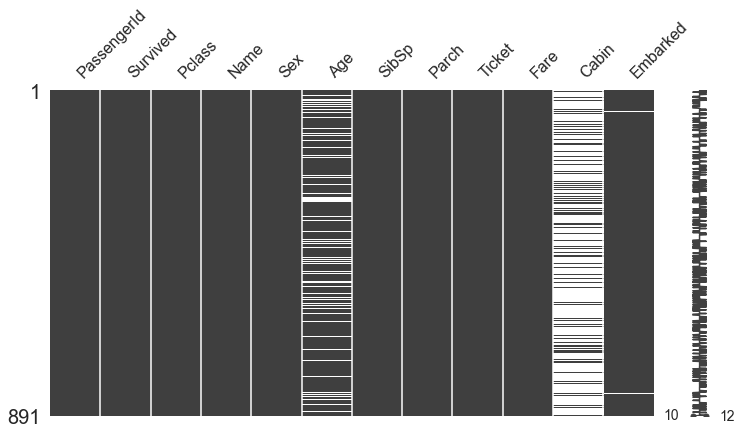

In [22]:
#pip install missingno
import missingno as msno
msno.matrix(titanic, figsize=(12,6))
#결측치의 분포를 보여주는 그래프

In [23]:
# 데이터 시각화를 위해 임시적으로 Age의 결측치를 처리하겠습니다. (결측치가 있으면 그래프 그릴 때 오류가 나는 경우도 있음)
# Age변수를 중간값으로 결측치 처리
titanic['Age']=titanic['Age'].fillna(titanic['Age'].median()) 

## 2. 독립변수의 분포 탐색

**독립 변수 파악**
- ~~PassengerId: index같이 단순 나열이기 때문에 필요 없음~~
- Pclass : 1,2,3 범주형 변수이자 순서형 변수이기도 함
- ~~Name: 종속변수에 영향을 주지 않는 변수이기 때문에 필요 없음~~
- Sex: Male/Female, 범주형 변수
- Age: 연속형 변수
- SibSp :연속형 변수
- Parch : 연속형 변수
- ~~Ticket : 종속변수에 영향을 주지 않는 변수이기 때문에 필요 없음~~
- Fare : 연속형 변수
- Embarked : S,C,Q, 범주형 변수

**연속형 변수**
- Age, SibSp, Parch, Fare

**범주형 변수**
- Pclass, Sex, Embarked

In [25]:
titanic.describe() #숫자형 자료의 요약통계량

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
titanic.describe(exclude=np.number) # 문자형 자료의 요약통계량 
#top은 최빈값

,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Harknett, Miss. Alice Phoebe",male,1601,S
freq,1,577,7,644


In [27]:
%matplotlib inline 
plt.rc('font', family='malgun gothic') # 한글 글씨체 지정, 한글 글씨체 깨지는 것 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 (-)기호가 깨지는 것 방지

### 연속형 변수의 분포 - Histogram, Distplot

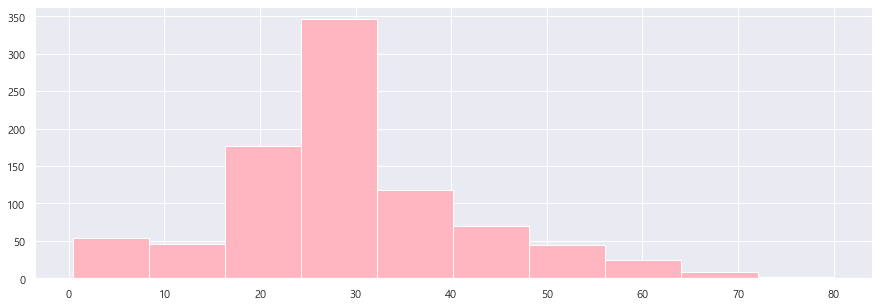

In [28]:
plt.figure(figsize=(15, 5))
plt.hist(titanic['Age'], color='lightpink')
# 그냥 히스토그램은 대략적인 분포를 보여준다. (이 경우 12..?단위씩 잘라서 보여줌)
# 구간을 수정하고 싶다면 bins로 조절
plt.show()

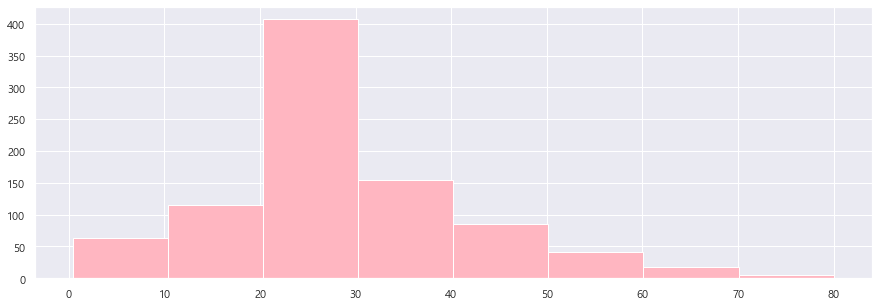

In [29]:
# 세대(10년씩)별 분포 확인
plt.figure(figsize=(15, 5))
plt.hist(titanic['Age'], bins=8, color='lightpink')
plt.show()

20대가 압도적으로 많다

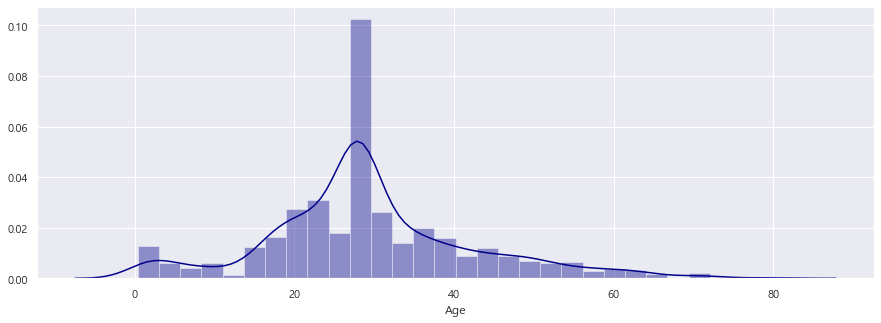

In [30]:
# seaborn에서 제공하는 distribution plot
plt.figure(figsize=(15, 5))
sns.distplot(titanic['Age'], color='darkblue') #색이 좀 연하게 나와서 진한색으로 색 지정
plt.show()

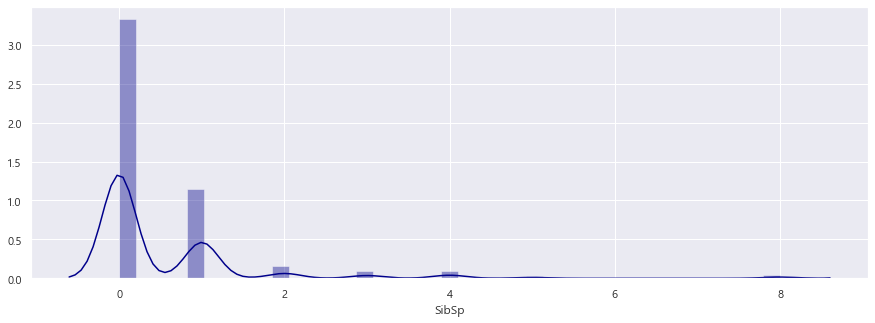

In [31]:
# SibSp
plt.figure(figsize=(15, 5))
sns.distplot(titanic['SibSp'], color='darkblue') 
plt.show()

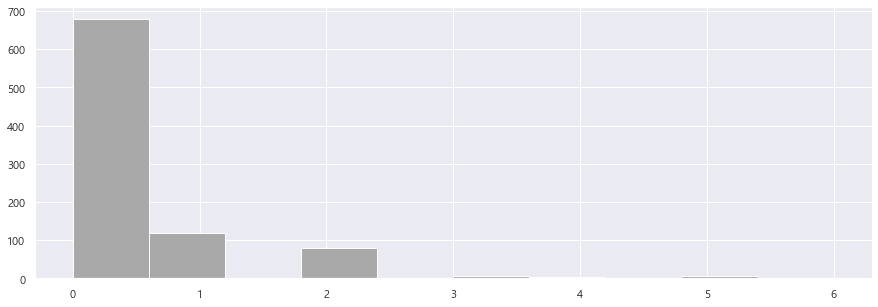

In [32]:
# Parch
# 이 경우는 분산이 너무 치우쳐져 있어 distribution plot이 안된다고 함
plt.figure(figsize=(15, 5))
plt.hist(titanic['Parch'], color='darkgray') #색이 좀 연하게 나와서 진한색으로 색 지정
plt.show()

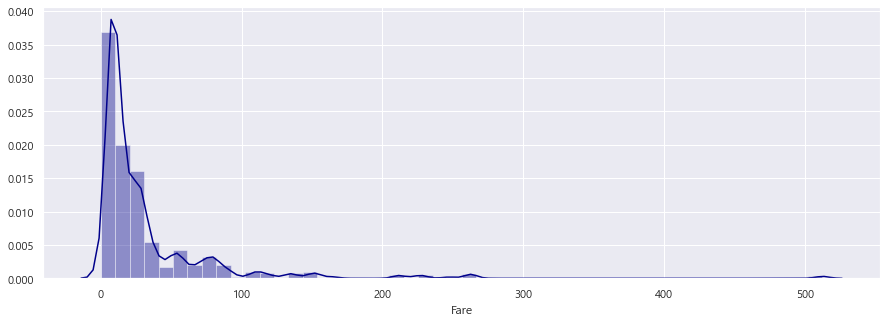

In [33]:
# SibSp
plt.figure(figsize=(15, 5))
sns.distplot(titanic['Fare'], color='darkblue') 
plt.show()

### 범주형 변수 - Bar graph

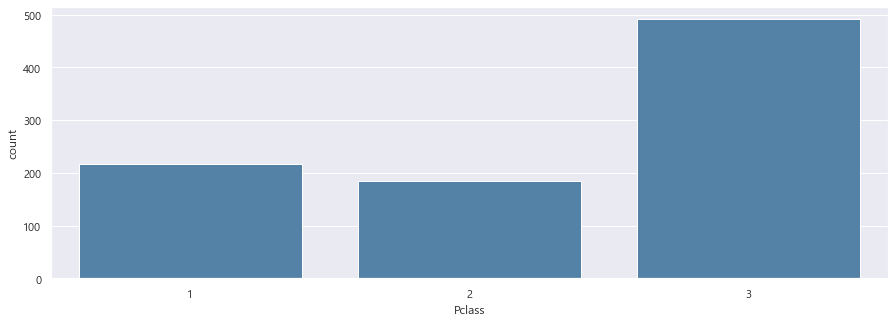

In [34]:
plt.figure(figsize=(15, 5))
sns.countplot(titanic['Pclass'],color='steelblue')
plt.show()

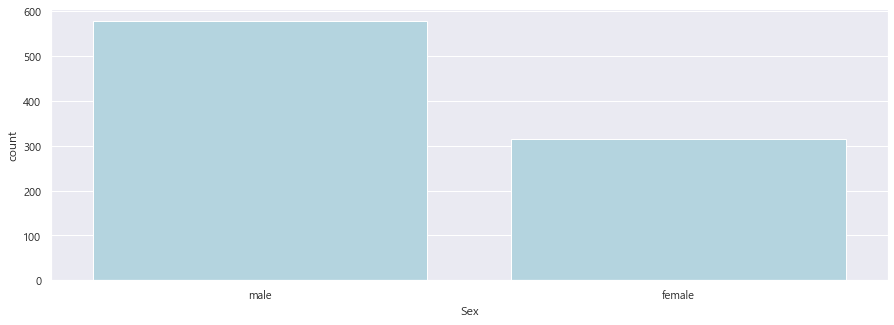

In [35]:
plt.figure(figsize=(15, 5))
sns.countplot(titanic['Sex'],color='lightblue')
plt.show()

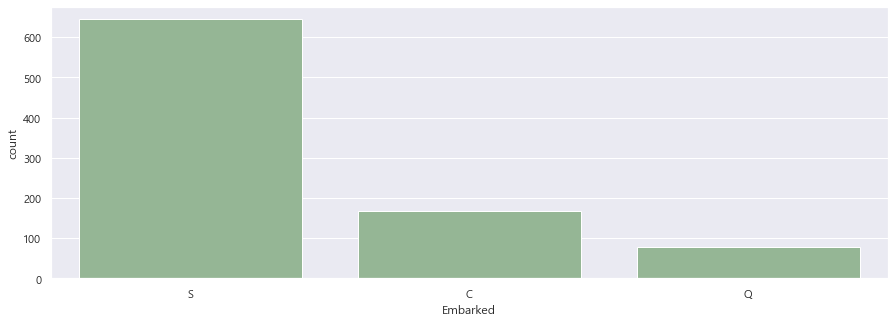

In [36]:
plt.figure(figsize=(15, 5))
sns.countplot(titanic['Embarked'],color='darkseagreen')
plt.show()

비율을 더 보고싶으면 pie chart도 가능하겠죠?!

## 3. 독립변수와 종속변수 사이의 관계 확인

### 사망 여부에 관한 Died라는 변수 추가
Survived와 Died를 함께 비교하기위해 새 변수를 만들어요!

In [37]:
titanic['Died']=1-titanic['Survived'] #사망했으면 1 생존했으면 0

### 1. 성별에 따른 생존의 차이

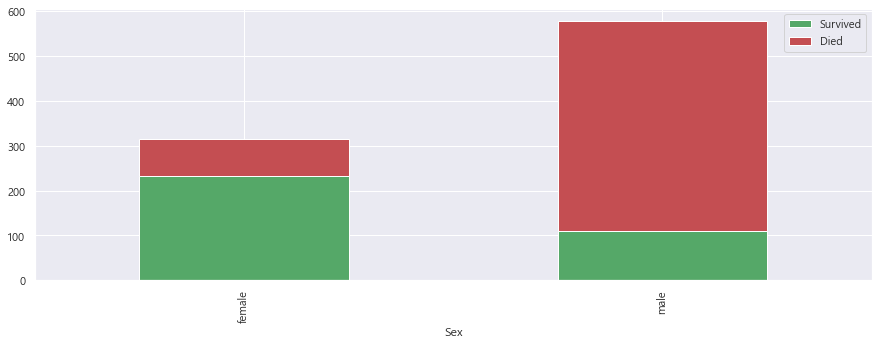

In [38]:
titanic.groupby('Sex')[['Survived', 'Died']].agg('sum').plot(kind='bar', figsize=(15, 5),
                                                             stacked=True, color=['g', 'r'])
#stacked bar plot
# 성별에 따라 사망

남성 탑승객이 여성에 비해 훨씬 많이 사망했음을 볼 수 있다. 

### 2. 성별과 나이에 따른 생존의 차이

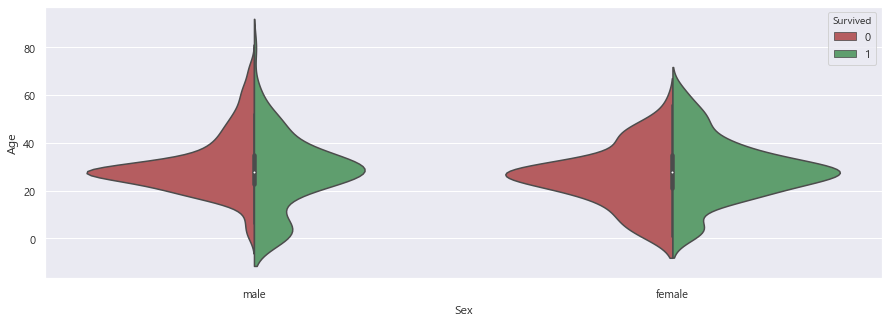

In [39]:
# violin plot
fig = plt.figure(figsize=(15, 5))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=titanic, 
               split=True, #split을 안하면 대칭인 그래프가 4개 나옴
               palette={0: "r", 1: "g"});

기본적으로 20~30대 탑승객이 가장 많았기 때문에 생존율과 사망율에 대한 분포도 20~30대가 높게 나왔다. 
<br/> 또한 어릴수록 생존율이 높았다. 하지만 남성의 경우 어릴수록 사망률이 낮았지만, 여성의 경우 나이와 생존여부에는 차이가 없어보인다.

따라서 구명 보트에 태울 수 있는 인원과 시간이 제한되어 있었는데, 여성과 어린아이를 우선순위로 태웠기 때문에 이와 같은 결과가 나왔음을 볼 수 있다.

## 3. 티켓 가격(Fare)과 클래서(Pclass)에 따른 생존율의 차이

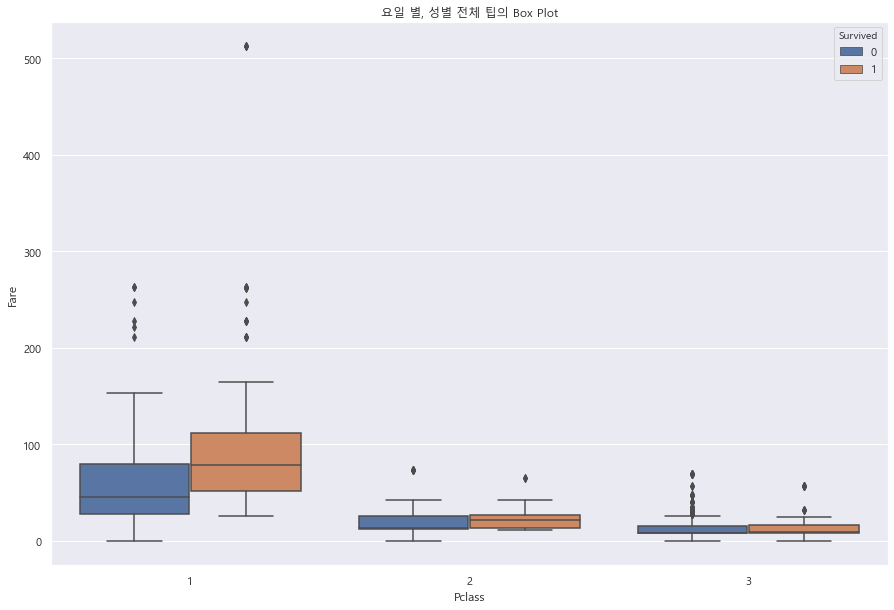

In [40]:
fig = plt.figure(figsize=(15, 10))
sns.boxplot(x="Pclass", y="Fare", hue="Survived", data=titanic)
plt.title("요일 별, 성별 전체 팁의 Box Plot")
plt.show()

더 높은 티켓 가격을 지불했을수록 생존확률이 높았다. 좌석 등급이 높을수록 티켓 가격이 비쌌으며, 2등급과 3등급좌석의 승객은 생존율과 사망율이 차이가 거의 나지 않는다. 

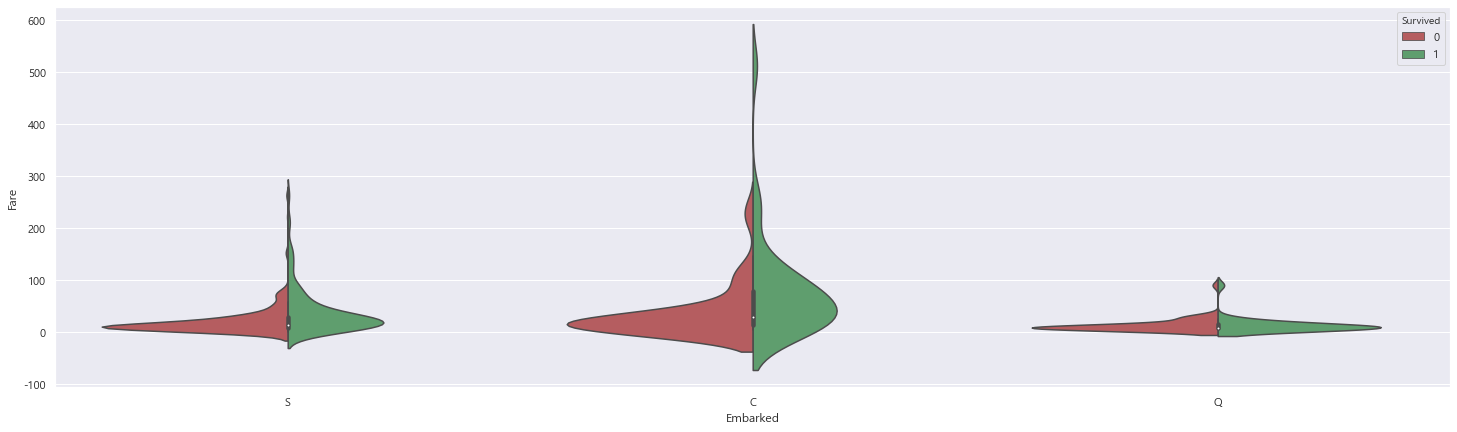

In [41]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=titanic, split=True, palette={0: "r", 1: "g"});


Embarked 변수: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

<img src='https://i.redd.it/xaab1urzkp041.png'>

※ EDA할 때에는 검색은 물론 도메인 지식에 대해 공부해야하는 경우가 있습니다!

Cherbourg > Southampton > Queenstown 순으로 티켓 가격이 비쌌지만, 오히려 생존율은 그 반대로 높았다.

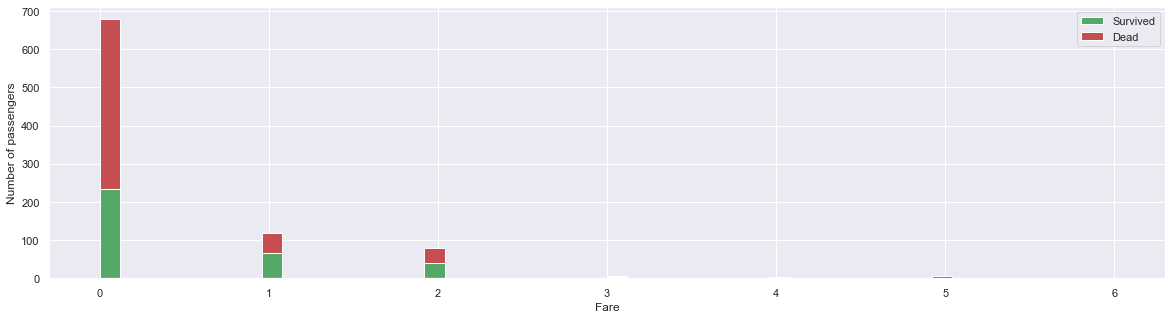

In [6]:
figure = plt.figure(figsize=(20, 5))
plt.hist([titanic.loc[titanic['Survived']==1,'Parch'], titanic.loc[titanic['Survived']==0,'Parch']], 
         stacked=True, color = ['g','r'], bins = 50, label = ['Survived','Dead'])
#생존한 사람들의 요금/생존하지 못한사람의 요금
#요금이 낮을 수록 생존확률 down
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

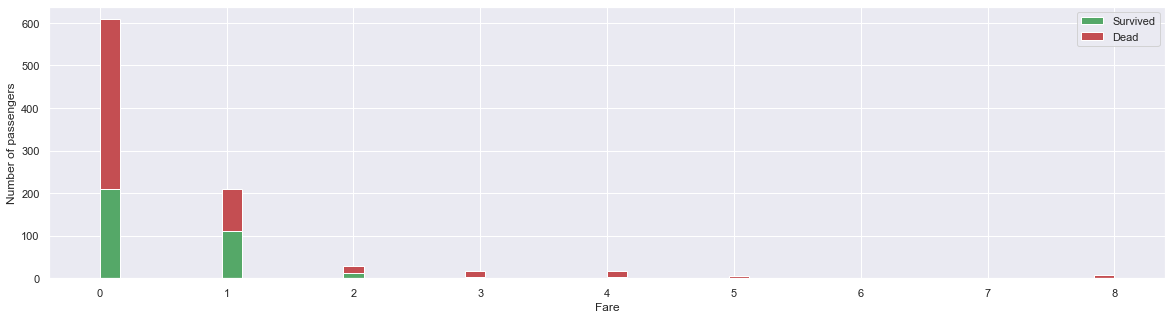

In [7]:
figure = plt.figure(figsize=(20, 5))
plt.hist([titanic.loc[titanic['Survived']==1,'SibSp'], titanic.loc[titanic['Survived']==0,'SibSp']], 
         stacked=True, color = ['g','r'], bins = 50, label = ['Survived','Dead'])
#생존한 사람들의 요금/생존하지 못한사람의 요금
#요금이 낮을 수록 생존확률 down
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

## 4. 상관관계 분석
일반적으로 두 변수간 상관관계에서 |상관계수|>=0.5일 경우 강한 (양의/음의) 상관관계가 있다고 합니다.

회귀를 모델링 할 경우 독립변수간 상관관계가 높으면 다중공선성 문제가 생기므로 일부 변수를 삭제하는 등의 해결방법을 모색해야합니다. 

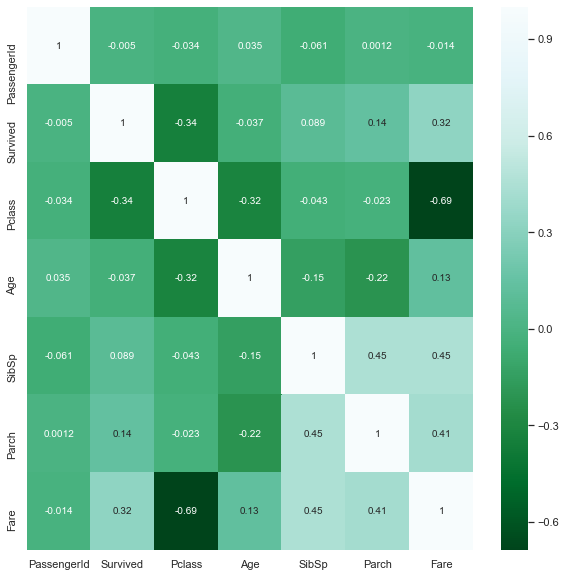

In [8]:
import scipy as sp
from scipy import stats

cor = titanic.corr(method = 'spearman')
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(cor, annot=True, cmap = 'BuGn_r')

좌석등급이 높으면 티켓 가격이 비싼 것 처럼, Pclass와 Fare이 강한 음의 상관관계에 있음을 볼 수 있습니다. (-0.69)

SibSp와 Parch, SibSp와 Fare도 상관관계가 꽤 높게 나왔는데(0.45), 이는 변수의 특성이 그러하다기 보단 관측치들의 값 때문에 우연히 크게 나온 것으로 보입니다.

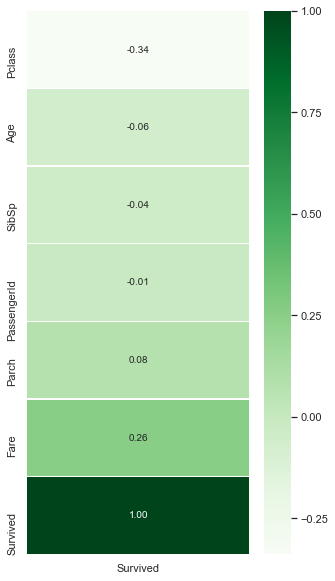

In [12]:
# del titanic.Died
fig,ax = plt.subplots(figsize=(5,10))
sns.heatmap(titanic.corr()[['Survived']].sort_values('Survived',ascending=1), cmap='Greens', annot=True, fmt = '.2f', linewidths=.5, )

종속변수 Survived와 강한 상관관계를 가진 독립변수는 없지만, (그나마 상관관계가 높은) Pclass에서 좌석등급이 높을수록 더 생존했다라고 할 수 있습니다.

## 5. Data Preprocessing & Feature Engineering
- **Data Preprocessing(데이터 전처리)**: 데이터의 형태를 조정, 혹은 결측값을 처리
- **Feature Engineering**: 분석 목적에 맞게 변수의 값을 바꿔주거나 새로운 변수를 생성
     - 말그대로 feature를 가공하고 조정
     
두 작업은 항상 개별적으로 이뤄지는 것이 아니라 함께 이뤄질 수 있음!

빅데이터 분석에서 80%를 차지한다고 할 수 있는 매우 중요한 과정임!

In [46]:
titanic=pd.read_csv('train.csv') #원본 데이터 다시 불러오기

### 1. Name 변수 -> 타이틀 추출
앞서 Name 변수는 문자열이기 때문에 시각화할 수도 없고 어떤 값을 얻어낼 수도 없어서 분포를 확인하지 않았다. 하지만 이 변수를 유심히 살펴보면, `Mr.`과 같은 타이틀이 섞여있는 것을 알 수 있다. 이는 단순히 `Mr.` 혹은 `Miss.`일 수도 있지만, `Master.`, `Sir.`과 같이 사회적 지위를 알려주는 **타이틀**도 포함되어 있기 때문에, 중요한 정보를 추출해낼 수 있다!

ex) Braund, Mr. Owen Harris : 이 예시처럼 title은 `, 뒤에` `. 앞에` 위치하고 있다

In [50]:
titles = set() #빈 set, 중복 제거
for name in titanic['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
titles

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [51]:
# 검색해서 얻은 정보! Title 별 지위 
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [52]:
#apply와 같은 기능의 함수 map: 행의 값에다가 dict 넣어주면 그에 해당하는 key값이 나오도록! 
titanic['Title']=titanic['Name'].map(lambda name : name.split(',')[1].split('.')[0].strip()) #title만 따온 열 생성
titanic['Title']=titanic['Title'].map(Title_Dictionary) #title에 따른 지위로 대체

In [53]:
titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

### 결측치를 처리하는 방법?
- 결측치가 존재하는 행삭제 (dropna())
    - 하지만 결측치를 모두 삭제하면 너무 많은 데이터의 손실이 있을 수 있습니다
- 평균으로 처리
- 중간값으로 처리
- 최빈값으로 처리
- 단순 회귀를 모델링 한 후 예측값으로 처리 (숫자형 자료만 가능)
- 결측치 자체를 하나의 값으로 생각 (범주형 자료만 가능)

### 2. Age 변수

In [48]:
titanic.Age.isnull().sum() # 177개의 결측치

177

In [54]:
#성별, 좌석등급, 타이틀별 나이의 중앙값
titanic.groupby(['Sex','Pclass','Title'])['Age'].median().reset_index() 

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0
5,female,2,Mrs,31.5
6,female,3,Miss,18.0
7,female,3,Mrs,31.0
8,male,1,Master,4.0
9,male,1,Mr,40.0


성별과 좌석등급, 타이틀에 따른 나이의 중앙값이 굉장히 다른 것을 확인할 수 있다. 

따라서 단순 중앙값으로 177개의 결측치(데이터의 20%)를 대체하기엔 무리가 있어보인다.

아래 코드는 성별과 좌석등급, 타이틀에 따른 나이의 중앙값으로 결측치를 대체하는 코드이다.

In [55]:
titanic['Age'].fillna(titanic.groupby(['Sex','Pclass','Title'])['Age'].transform('median'), inplace=True)

### 3. Embarked

In [56]:
titanic.Embarked.isnull().sum()

2

In [58]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

결측치가 2개밖에 없으므로 최빈값인 S로 대체한다

In [57]:
titanic['Embarked'].fillna('S', inplace=True)

### 4. Cabin

결측치가 너무 많고 종속변수와 크게 연관있는 변수가 아니라고 판단하여 변수를 삭제한다.

In [60]:
titanic.drop('Cabin', axis=1, inplace=True)

### 5. Sibsp & Parch

Sibsp와 Parch는 모두 동승한 가족의 수를 의미하므로, 두 변수를 합쳐 새로운 `Family`라는 변수를 만든다.

**Sibsp + Parch + 1**을 하여 (본인 포함) 탑승한 가족의 수를 나타낸다.

In [61]:
titanic['Family']=titanic['SibSp']+titanic['Parch']+1

<br/>

### 이제 쓰지 않는 변수들을 모두 버립니다.

In [62]:
titanic.drop(['PassengerId','Name','Ticket','SibSp','Parch'], axis=1) 

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,0,3,male,22.0,7.2500,S,Mr,2
1,1,1,female,38.0,71.2833,C,Mrs,2
2,1,3,female,26.0,7.9250,S,Miss,1
3,1,1,female,35.0,53.1000,S,Mrs,2
4,0,3,male,35.0,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Officer,1
887,1,1,female,19.0,30.0000,S,Miss,1
888,0,3,female,18.0,23.4500,S,Miss,4
889,1,1,male,26.0,30.0000,C,Mr,1


In [63]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1


<br/>
<br/>
여기까지가 저희가 준비한 EDA과정입니다! 앞서 말씀드린 것처럼, EDA는 정답이 없고 본인이 데이터에 대한 이해도를 높일 수 있는 방향으로, 시각화하기 편한 방향으로 해주시면 됩니다. 다음주까지 해야하는 과제는 새로운 데이터셋을 가지고 직접 EDA 해보기 입니다.

지금까지 정말 수고 많으셨습니다! 부족한 멘토들 잘 따라와줘서 고맙고, 열심히 해주는 모습을 보고 많은 보람을 느꼈답니다..! <br/>
다들 정말 똑똑하고 열심히해서, 보아즈에서 더 많이 성장하고 좋은 결과 낼 수 있을거에요!! 모두 화이팅입니다 :))